In [3]:
import scipy.ndimage as ndi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import pims
#import time
#import csv
import skimage
from skimage.morphology import watershed
from skimage.feature import peak_local_max
from skimage import measure
import scipy.spatial
import seaborn as sns
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d



In [5]:
#IN = pd.read_csv('./INPosition.csv', skiprows= 3)
#pqbp1 = pd.read_csv('./INPQBP1Position.csv', skiprows= 3)
#cgas = pd.read_csv('./INcGASPosition.csv', skiprows= 3)
#triple = pd.read_csv('./TriplePosition.csv', skiprows=3)

#f_pqbp1 = "/media/agulhas/N74DOMXTHP1/plate3wt/fix/tif/Imaris/PQBP1_Image_1_Statistics/Position.csv"
#f_IN = "/media/agulhas/N74DOMXTHP1/plate3wt/fix/tif/Imaris/IN_Image_1_Statistics/Position.csv"
#f_cgas = "/media/agulhas/N74DOMXTHP1/plate3wt/fix/tif/Imaris/cGAS_Image_1_Statistics/Position.csv"
#f_triple = "/media/agulhas/N74DOMXTHP1/plate3wt/fix/tif/Imaris/Triple_Image_1_Statistics/Position.csv"

f_pqbp1 = "/media/agulhas/N74DOMXTHP1/plate3wt/fix/tif/Imaris/allIN_Statistics/Position.csv"
f_IN = "/media/agulhas/N74DOMXTHP1/plate3wt/fix/tif/Imaris/allpqbp1_Statistics/Position.csv"
f_cgas = "/media/agulhas/N74DOMXTHP1/plate3wt/fix/tif/Imaris/allcGAS_Statistics/Position.csv"
IN = pd.read_csv(f_IN, skiprows= 3)
pqbp1 = pd.read_csv(f_pqbp1, skiprows= 3)
cgas = pd.read_csv(f_cgas, skiprows= 3)
#triple = pd.read_csv(f_triple, skiprows=3)


In [6]:
in_count = IN.index.max()+1
pqbp1_count = pqbp1.index.max()+1
cgas_count = cgas.index.max()+1
triple_count = triple.index.max()+1
IN.head()


NameError: name 'triple' is not defined

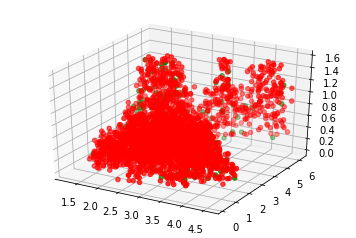

In [7]:
%matplotlib inline
psize = 0.0786999985575676
zsize = 0.125
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(IN['Position X']*psize,IN['Position Y']*psize,IN['Position Z']*zsize, color='red')
ax.scatter3D(pqbp1['Position X']*psize,pqbp1['Position Y']*psize,pqbp1['Position Z']*zsize, color='green')

In [273]:
#
psize = 0.0786999985575676
zsize = 0.125
INpos = zip(IN['Position X']*psize ,IN['Position Y']*psize ,IN['Position Z']*zsize )

pqbp1_pos = zip(pqbp1['Position X']*psize ,IN['Position Y']*psize ,IN['Position Z']*zsize )
cgas_pos = zip(cgas['Position X']*psize ,IN['Position Y']*psize ,IN['Position Z']*zsize )
triple_pos = zip(triple['Position X']*psize ,triple['Position Y']*psize ,triple['Position Z']*0.2)

In [291]:
#Nearest Neighbor Brute Force - I used 5 pixels for max distance in imaris
pqbp1_kd = scipy.spatial.cKDTree(pqbp1_pos,leafsize=10000)
pqbp1_closest = np.asarray(pqbp1_kd.query(INpos,p=2,
                #distance_upper_bound=10*psize
                ))[0]

cgas_kd = scipy.spatial.cKDTree(cgas_pos,leafsize=10000)
cgas_closest = np.asarray(cgas_kd.query(INpos,p=2,
                #distance_upper_bound=10*psize
                ))[0]

triple_kd = scipy.spatial.cKDTree(triple_pos,leafsize=10000)
triple_closest = np.asarray(triple_kd.query(INpos,p=2,
                #distance_upper_bound=10*psize
                ))[0]

In [292]:
print(in_count)
print(len(pqbp1_closest))
print(len(cgas_closest))
print(pqbp1_closest)


2580
2580
2580
[4.04197684 1.61379592 0.33836015 ... 8.71388651 8.98570112 9.23106314]


In [294]:
#remove non colocalized infinites
pqbp1_closest = pqbp1_closest[pqbp1_closest < 10*psize]
cgas_closest = cgas_closest[cgas_closest < 10*psize]
print(len(pqbp1_closest))
print(len(cgas_closest))
print(pqbp1_closest)


441
730
[0.33836015 0.0927873  0.48077026 0.39613999 0.69830125 0.51601086
 0.70748638 0.64471039 0.42466519 0.41033295 0.71144662 0.35942289
 0.4810571  0.29591553 0.45032401 0.61110879 0.74375135 0.68384949
 0.61799927 0.64310848 0.63900456 0.76834334 0.75129154 0.75934921
 0.46050246 0.38417636 0.44183623 0.72284227 0.75670681 0.67320652
 0.57441542 0.67778644 0.37960627 0.56401705 0.54764884 0.60428793
 0.32672969 0.77399037 0.78258791 0.6281209  0.56984033 0.41608157
 0.73599564 0.53026051 0.50379219 0.669076   0.25251617 0.72844312
 0.75293431 0.62398032 0.64901204 0.30872329 0.73577269 0.76928708
 0.40524092 0.67754126 0.32169252 0.42483477 0.58335348 0.63775088
 0.55550485 0.43463048 0.729662   0.78159326 0.57364964 0.67543917
 0.70068372 0.64698309 0.54085076 0.70651569 0.45471122 0.57403779
 0.41592949 0.61193735 0.54434309 0.55286958 0.43741915 0.61039719
 0.37229488 0.068469   0.53106351 0.30044873 0.54347435 0.53879526
 0.4357721  0.43449458 0.71065107 0.7027217  0.2290957

('Total IN:', 2580)
('Percentage PQBP1', 54.65116279069767, '%')
('Percentage Triple', 4.186046511627907, '%')
('IN+cGAS without PQBP1', 107.71317829457365, '%')


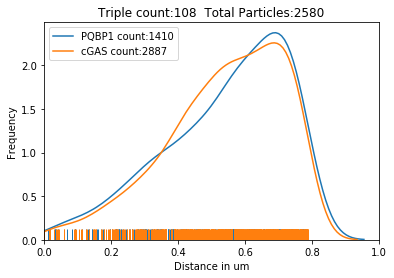

In [295]:
label = 'PQBP1 count:'+ str(pqbp1_count)
ax = sns.distplot(pqbp1_closest, hist=False, rug=True,label=label)
label = 'cGAS count:'+ str(cgas_count)
ax = sns.distplot(cgas_closest, hist=False, rug=True, label=label)

#ax = sns.distplot(triple_closest, hist=False, rug=True, label='triple for control')
#plt.yscale('log', nonposy='clip')
ax.set(xlabel='Distance in um', ylabel='Frequency',Title= 'Triple count:'+ str(triple_count) 
       + '  Total Particles:' + str(in_count)
       #,xscale="log"
       #,yscale="log"
       
      )
ax.set_xlim(0,1)

print("Total IN:",in_count)
print("Percentage PQBP1", pqbp1_count/float(in_count)*100, "%")
print("Percentage Triple", triple_count/float(in_count)*100, "%")
print("IN+cGAS without PQBP1", cgas_count/float(in_count)*100 - triple_count/float(in_count)*100 , "%")

In [290]:
print(pqbp1_closest.min())

print(cgas_closest.min())

0.011017999798063727
0.0006295999884571302


In [203]:
INl = list()
pqbp1l = list()
cgasl = list()
triplel = list()
psize = 0.0786999985575676
zsize = 0.125
for i in range(1,11):
    f_pqbp1 = "/media/agulhas/N74DOMXTHP1/plate3wt/fix/tif/Imaris/PQBP1_Image_"+str(i)+"_Statistics/Position.csv"
    f_IN = "/media/agulhas/N74DOMXTHP1/plate3wt/fix/tif/Imaris/IN_Image_"+str(i)+"_Statistics/Position.csv"
    f_cgas = "/media/agulhas/N74DOMXTHP1/plate3wt/fix/tif/Imaris/cGAS_Image_"+str(i)+"_Statistics/Position.csv"
    f_triple = "/media/agulhas/N74DOMXTHP1/plate3wt/fix/tif/Imaris/Triple_Image_"+str(i)+"_Statistics/Position.csv"

    #f_pqbp1 = "/media/agulhas/N74DOMXTHP1/plate3wt/fix/tif/Imaris/AllIN_Statistics/Position.csv"
    #f_IN = "/media/agulhas/N74DOMXTHP1/plate3wt/fix/tif/Imaris/Allpqbp1_Statistics/Position.csv"
    #f_cgas = "/media/agulhas/N74DOMXTHP1/plate3wt/fix/tif/Imaris/allcGAS_Statistics/Position.csv"
    INl.append(pd.read_csv(f_IN, skiprows= 3))
    pqbp1l.append(pd.read_csv(f_pqbp1, skiprows= 3))
    cgasl.append(pd.read_csv(f_cgas, skiprows= 3))
    triplel.append(pd.read_csv(f_triple, skiprows=3))

In [223]:
pqbp1_list = list()
cgas_list = list()
in_list = list()
triple_list = list()

for i in range(10):
    IN = INl[i]
    pqbp1 = pqbp1l[i]
    cgas = cgasl[i]
    triple = triplel[i]
    
    INpos = zip(IN['Position X']*psize ,IN['Position Y']*psize ,IN['Position Z']*zsize )
    pqbp1_pos = zip(pqbp1['Position X']*psize ,IN['Position Y']*psize ,IN['Position Z']*zsize )
    cgas_pos = zip(cgas['Position X']*psize ,IN['Position Y']*psize ,IN['Position Z']*zsize )
    triple_pos = zip(triple['Position X']*psize ,triple['Position Y']*psize ,triple['Position Z']*zsize)
    #Nearest Neighbor Brute Force - I used 5 pixels for max distance in imaris
    pqbp1_kd = scipy.spatial.KDTree(INpos,leafsize=10)
    pqbp1_closest = np.asarray(pqbp1_kd.query(pqbp1_pos,p=2,k=1,
                    distance_upper_bound=5*psize))[0]

    cgas_kd = scipy.spatial.KDTree(INpos,leafsize=10)
    cgas_closest = np.asarray(cgas_kd.query(cgas_pos,p=2,k=1,
                    distance_upper_bound=5*psize))[0]

    triple_kd = scipy.spatial.KDTree(INpos,leafsize=10)
    triple_closest = np.asarray(triple_kd.query(triple_pos,p=2,k=1,
                    distance_upper_bound=5*psize))[0]

    #in_list.append(INpos)
    pqbp1_list.append(pqbp1_closest)
    cgas_list.append(cgas_closest)
    triple_list.append(triple_closest)
    
flatten = lambda l : [item for sublist in l  for item in sublist]
print len(pqbp1_list)
pqbp1_list =  np.asarray(flatten(pqbp1_list))
print len(pqbp1_list)
cgas_list = np.asarray(flatten(cgas_list))
triple_list = np.asarray(flatten(triple_list))

10
11832


In [224]:
print pqbp1_closest

[inf inf inf ... inf inf inf]


In [225]:
pqbp1_list = pqbp1_list[pqbp1_list < 5*psize]
cgas_list = cgas_list[cgas_list < 5*psize]
triple_list = triple_list[triple_list < 5*psize]
print len(pqbp1_list)

1138


1138
542


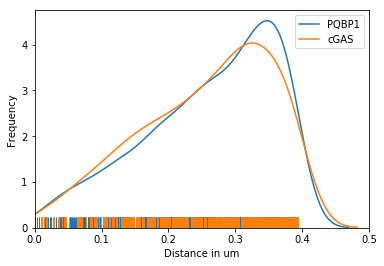

In [226]:
label = 'PQBP1'# count:'+ str(pqbp1_count)
ax = sns.distplot(pqbp1_list, hist=False, rug=True,label=label)
label = 'cGAS'# count:'+ str(cgas_count)
ax = sns.distplot(cgas_list, hist=False, rug=True, label=label)

#ax = sns.distplot(triple_closest, hist=False, rug=True, label='triple for control')
#plt.yscale('log', nonposy='clip')
ax.set(xlabel='Distance in um', ylabel='Frequency'
       #,Title= 'Triple count:'+ str(triple_count) 
       #+ '  Total Particles:' + str(in_count)
       #,xscale="log"
       #,yscale="log"
       
      )
ax.set_xlim(0,0.5)

print len(pqbp1_list)
print len(cgas_list)

(0, 0.5)

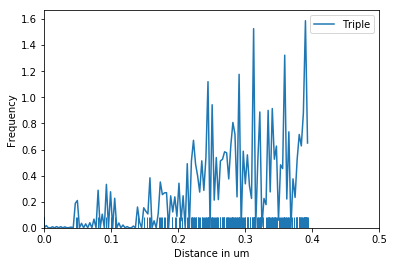

In [207]:
label = 'Triple'# count:'+ str(cgas_count)
ax = sns.distplot(triple_list, hist=False, rug=True, label=label)

#ax = sns.distplot(triple_closest, hist=False, rug=True, label='triple for control')
#plt.yscale('log', nonposy='clip')
ax.set(xlabel='Distance in um', ylabel='Frequency'
       #,Title= 'Triple count:'+ str(triple_count) 
       #+ '  Total Particles:' + str(in_count)
       #,xscale="log"
       #,yscale="log"
       
      )
ax.set_xlim(0,0.5)

In [209]:
in_count = IN.index.max()+1
pqbp1_count = pqbp1.index.max()+1
cgas_count = cgas.index.max()+1
triple_count = triple.index.max()+1


In [210]:
print pqbp1_count

1756
